In [23]:
import pandas as pd
import numpy as np
import itertools
from konlpy.tag import Mecab
from Preprocess import load
from Preprocess.load import DataLoad
from Preprocess.preprocess import Preprocess
from Preprocess import preprocess
from Model.model import TfIdf, Doc2Vec, PcaCluster

In [24]:
loader = DataLoad(
    tran_path="../Data/csv/sample_transcripts.csv",
    meta_path="../Data/csv/sample_videos.csv"
)

In [3]:
texts_df_popular, texts_df_unpopular = loader.get_data_set(save=False)

In [4]:
stopwords = DataLoad.load_stopwords()

In [5]:
preprocessor = Preprocess(stopwords)

In [6]:
popular_clean_df = preprocessor.get_cleaned_df(texts_df_popular, save=True, file_nm="popular_clean_df")
unpopular_clean_df = preprocessor.get_cleaned_df(texts_df_unpopular, save=True, file_nm="unpopular_clean_df")

[Kss]: Oh! You have konlpy.tag.Mecab in your environment. Kss will take this as a backend! :D



  0%|          | 0/42 [00:00<?, ?it/s]

  0%|          | 0/142 [00:00<?, ?it/s]

  0%|          | 0/97 [00:00<?, ?it/s]

  0%|          | 0/134 [00:00<?, ?it/s]

  0%|          | 0/44 [00:00<?, ?it/s]

  0%|          | 0/69 [00:00<?, ?it/s]

  0%|          | 0/389 [00:00<?, ?it/s]

  0%|          | 0/149 [00:00<?, ?it/s]

  0%|          | 0/355 [00:00<?, ?it/s]

  0%|          | 0/88 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

  0%|          | 0/104 [00:00<?, ?it/s]

  0%|          | 0/101 [00:00<?, ?it/s]

  0%|          | 0/61 [00:00<?, ?it/s]

  0%|          | 0/86 [00:00<?, ?it/s]

  0%|          | 0/52 [00:00<?, ?it/s]

  0%|          | 0/251 [00:00<?, ?it/s]

  0%|          | 0/527 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

  0%|          | 0/70 [00:00<?, ?it/s]

  0%|          | 0/53 [00:00<?, ?it/s]

  0%|          | 0/85 [00:00<?, ?it/s]

  0%|          | 0/43 [00:00<?, ?it/s]

  0%|          | 0/64 [00:00<?, ?it/s]

  0%|          | 0/820 [00:00<?, ?it/s]

  0%|          | 0/205 [00:00<?, ?it/s]

  0%|          | 0/151 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

  0%|          | 0/45 [00:00<?, ?it/s]

  0%|          | 0/166 [00:00<?, ?it/s]

  0%|          | 0/48 [00:00<?, ?it/s]

  0%|          | 0/104 [00:00<?, ?it/s]

  0%|          | 0/290 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/181 [00:00<?, ?it/s]

  0%|          | 0/318 [00:00<?, ?it/s]

  0%|          | 0/377 [00:00<?, ?it/s]

  0%|          | 0/444 [00:00<?, ?it/s]

  0%|          | 0/181 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/108 [00:00<?, ?it/s]

  0%|          | 0/362 [00:00<?, ?it/s]

  0%|          | 0/185 [00:00<?, ?it/s]

  0%|          | 0/39 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

  0%|          | 0/365 [00:00<?, ?it/s]

  0%|          | 0/105 [00:00<?, ?it/s]

  0%|          | 0/35 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/92 [00:00<?, ?it/s]

  0%|          | 0/108 [00:00<?, ?it/s]

  0%|          | 0/41 [00:00<?, ?it/s]

  0%|          | 0/168 [00:00<?, ?it/s]

  0%|          | 0/74 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/72 [00:00<?, ?it/s]

  0%|          | 0/46 [00:00<?, ?it/s]

In [7]:
popular_clean_df = pd.read_csv("../Data/csv/popular_clean_df.csv", index_col=0)
unpopular_clean_df = pd.read_csv("../Data/csv/unpopular_clean_df.csv", index_col=0)

In [8]:
popular_list, unpopular_list, texts = preprocess.get_list_dataset(popular_clean_df, unpopular_clean_df)

In [9]:
tfidf = TfIdf(
    texts=texts,
    tokenizer=preprocess.tokenizer
)

In [10]:
popular_tfidf, unpopular_tfidf = tfidf.transform_into_vector(popular_list, unpopular_list)

/Users/jylee/Desktop/GeniA_project/venv/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [11]:
po_kw_df, unpo_kw_df = tfidf.get_keywords(popular_tfidf=popular_tfidf, unpopular_tfidf=unpopular_tfidf, top_n=10)

In [12]:
math_list = loader.load_math_list()

In [14]:
cnt_po, cnt_unpo = 0,0
for i in range(len(po_kw_df)):
    count_po = po_kw_df.loc[i].apply(lambda x: x not in math_list).sum()
    count_unpo = unpo_kw_df.loc[i].apply(lambda x: x not in math_list).sum()
    cnt_po += count_po
    cnt_unpo += count_unpo


print("TF-IDF의 중요단어 중 수학용어가 나오지 않은 수")
print("="*50)
print(f"인기강좌 : {cnt_po}")
print(f"비인기강좌 : {cnt_unpo}")

TF-IDF의 중요단어 중 수학용어가 나오지 않은 수
인기강좌 : 157
비인기강좌 : 132


애인, 이수근, 고기, 급식 등 비인기강좌에서는 보기힘든 비수업적인 용어들이 더욱 많이 관찰되었다

---
## Doc2Vec & Clustering

  0%|          | 0/60 [00:00<?, ?it/s]

인기 강좌 별 유사강의 TOP 10에서 '인기강좌'인 비율의 평균은 68.33% 입니다
비인기 강좌 별 유사강의 TOP 10에서 '비인기강좌'인 비율의 평균은 64.0% 입니다


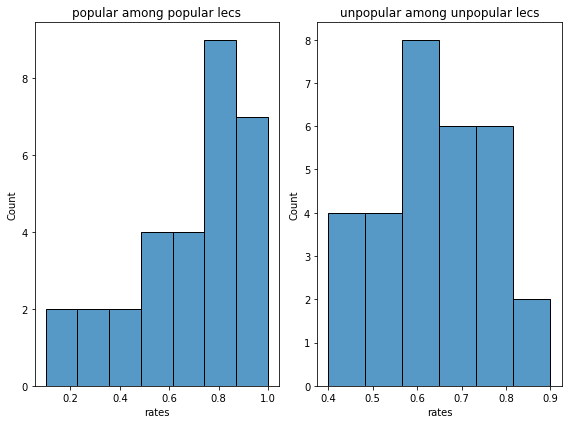

In [15]:
doc2vec = Doc2Vec(
    popular_list=popular_list,
    unpopular_list=unpopular_list
)
total_doc_df, tagged_corpus_list = doc2vec.get_doc2vec_sets()
doc2vec.fit(tagged_corpus_list=tagged_corpus_list)
doc2vec.get_similarity_rate(save=True)

In [16]:
pca_cluster = PcaCluster(pca_n_components=3, random_state=42)
df_pca = pca_cluster.get_df_pca(doc2vec.model.dv.vectors)

In [17]:
df = pca_cluster.fit_transform(df_pca)

Explained variation per principle component: [0.08661327 0.06595717 0.05682396]


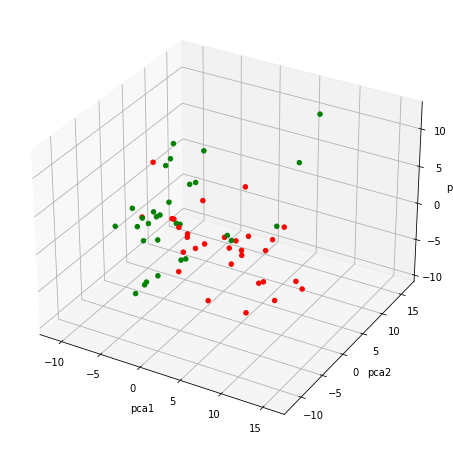

In [18]:
pca_cluster._plot_pca_results(df, dim=3, save=False)

Kmeans 클러스터링 결과와 실제 label은 70.0% 만큼 일치합니다
              precision    recall  f1-score   support

           0       0.77      0.57      0.65        30
           1       0.66      0.83      0.74        30

    accuracy                           0.70        60
   macro avg       0.72      0.70      0.69        60
weighted avg       0.72      0.70      0.69        60



/Users/jylee/Desktop/GeniA_project/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


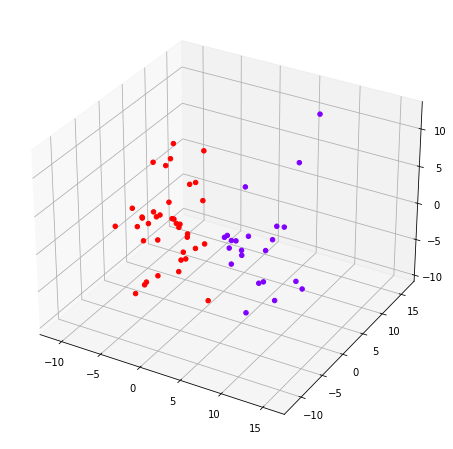

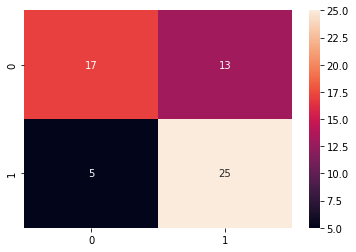

In [20]:
df_kmeans = pca_cluster.Kmeans(df, show_plot=True, cm=True, save=False)